In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('h1n1_vaccine_prediction (1).csv')
data.head(3)


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0


In [3]:
data_2 = data.copy()

In [4]:
data.shape

(26707, 34)

# CHECKING DATA TYPE

In [5]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [6]:
a = ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc',  'no_of_adults', 'no_of_children']
for i in a:
    data[i] = data[i].astype('object')
data.dtypes.head()

unique_id                int64
h1n1_worry              object
h1n1_awareness          object
antiviral_medication    object
contact_avoidance       object
dtype: object

In [7]:
data['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [8]:
df_features = data.iloc[:, data.columns != 'h1n1_vaccine']
df_target = data.iloc[:, data.columns == 'h1n1_vaccine']

In [9]:
df_target['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

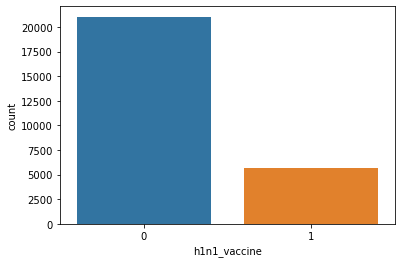

In [10]:
sns.countplot(df_target['h1n1_vaccine']) 

# MISSING VALUES

In [11]:
missing_values_before = data.shape

In [12]:
a = data.isnull().sum()
missing_data = a.sort_values(ascending= False)
per = (data.isnull().sum() * 100/data.isnull().count() )
percent = per.sort_values(ascending= False)
missing_values = pd.concat([missing_data,percent], axis = 1, keys = ['total','missing_percent'])
missing_values.head()

,total,missing_percent
has_health_insur,12274,45.957989
income_level,4423,16.561201
dr_recc_h1n1_vacc,2160,8.087767
dr_recc_seasonal_vacc,2160,8.087767
housing_status,2042,7.645936


In [13]:
data = data.drop(['unique_id','has_health_insur','income_level','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc'], axis = 1)

In [14]:
a = data.isnull().sum()
missing_data = a.sort_values(ascending= False)
per = (data.isnull().sum() * 100/data.isnull().count())
percent = per.sort_values(ascending= False)
missing_values = pd.concat([missing_data,percent], axis = 1, keys = ['total','missing_percent'])
missing_values.head(5)

,total,missing_percent
housing_status,2042,7.645936
employment,1463,5.477965
marital_status,1408,5.272026
qualification,1407,5.268282
chronic_medic_condition,971,3.635751


In [15]:
data = data.dropna(axis = 0)

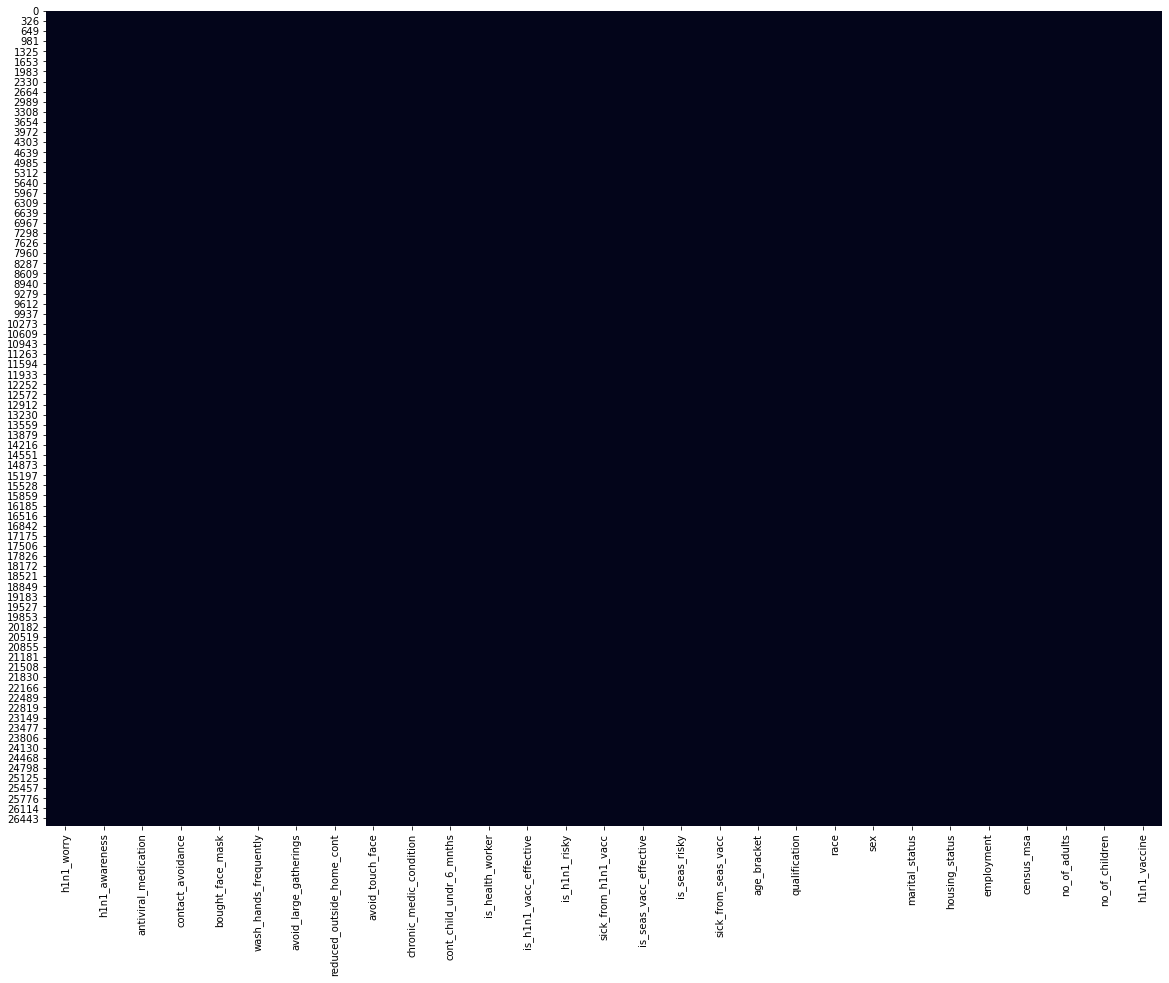

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20,15]
sns.heatmap(data.isnull(), cbar=False)

In [17]:
missing_values_after = data.shape

In [18]:
import operator
missing_rows_columns = tuple(map(operator.sub,missing_values_before,missing_values_after))
missing_rows_columns

(3281, 5)

In [19]:
a = data.reset_index()
data_new = a.drop(['index'], axis = 1)

In [20]:
data_new.head(1)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,qualification,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1,0,0,0,0,0,0,1,1,0,...,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0,0,0


In [21]:
data_new.head(3)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,qualification,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1,0,0,0,0,0,0,1,1,0,...,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0,0,0
1,3,2,0,1,0,1,0,1,1,0,...,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0,0,0
2,1,1,0,1,0,0,0,0,0,1,...,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2,0,0


In [22]:
data_new['h1n1_vaccine'].value_counts()

0    18389
1     5037
Name: h1n1_vaccine, dtype: int64

In [23]:
data_new.dtypes.head(5)

h1n1_worry              object
h1n1_awareness          object
antiviral_medication    object
contact_avoidance       object
bought_face_mask        object
dtype: object

# balancing data

In [24]:
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler(random_state = 1)
x_sampled,y_sampled = random.fit_resample(df_features,df_target)

In [25]:
x_sampled

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1,0,0,0,0,0,0,1,1,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0,0
1,1,3,2,0,1,0,1,0,1,1,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0,0
2,2,1,1,0,1,0,0,0,0,0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2,0
3,3,1,1,0,1,0,1,1,0,0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0,0
4,4,2,1,0,1,0,1,1,0,1,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42061,24595,3,1,0,0,NaN,0,1,1,0,...,12 Years,Hispanic,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1,3
42062,5738,0,1,0,1,0,0,0,0,1,...,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,Non-MSA,0,0
42063,10195,2,2,0,1,1,1,1,0,1,...,College Graduate,Other or Multiple,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1,0
42064,4607,2,1,0,1,1,1,1,1,1,...,< 12 Years,Hispanic,Male,NaN,Married,Rent,Employed,"MSA, Not Principle City",1,1


In [26]:
print(x_sampled.shape, y_sampled.shape)

(42066, 33) (42066, 1)


In [27]:
x_sampled

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1,0,0,0,0,0,0,1,1,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0,0
1,1,3,2,0,1,0,1,0,1,1,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0,0
2,2,1,1,0,1,0,0,0,0,0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2,0
3,3,1,1,0,1,0,1,1,0,0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0,0
4,4,2,1,0,1,0,1,1,0,1,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42061,24595,3,1,0,0,NaN,0,1,1,0,...,12 Years,Hispanic,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1,3
42062,5738,0,1,0,1,0,0,0,0,1,...,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,Non-MSA,0,0
42063,10195,2,2,0,1,1,1,1,0,1,...,College Graduate,Other or Multiple,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1,0
42064,4607,2,1,0,1,1,1,1,1,1,...,< 12 Years,Hispanic,Male,NaN,Married,Rent,Employed,"MSA, Not Principle City",1,1


In [28]:
data_1 = pd.concat([x_sampled,y_sampled], axis = 1)

# data processing

In [29]:
data_1.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [30]:
data.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [31]:
x_variables = data_1.drop(['unique_id','h1n1_vaccine'], axis =1)
y_variables = pd.DataFrame(data_1['h1n1_vaccine'], columns= ['h1n1_vaccine'])

In [32]:
print(x_variables.shape, y_variables.shape)

(42066, 32) (42066, 1)


In [33]:
x_var_dummy = pd.get_dummies(x_variables,drop_first= True)
x_var_dummy.shape

(42066, 67)

In [34]:
x_data = x_var_dummy
y_data = y_variables

# FUNCTIONS

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plt_confusion_matrices(model):
    cm = confusion_matrix(y1_test,y1_predict)
    conf_matrices = pd.DataFrame(data = cm,columns = ['predicted 0','predicted 1'], index = ['actual 0', 'actual 1'])
    sns.heatmap(conf_matrices, annot = True,fmt  = 'd',cmap = ListedColormap(['lightskyblue']), linewidths = 0.2,annot_kws = {'size':25},cbar = False)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [36]:
from sklearn.metrics import classification_report
def classi_report(model):
    return(classification_report(y1_test,y1_predict))

In [37]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
def reports(model):
    print('precision_score - ',precision_score(y1_test,y1_predict))
    print('recall_score - ', recall_score(y1_test,y1_predict))
    print('accuracy_score - ', accuracy_score(y1_test,y1_predict))
    print('f1_score - ', f1_score(y1_test,y1_predict))

In [38]:
from sklearn.metrics import roc_auc_score,roc_curve
def plt_roc(model):
    fpr,tpr,thresholds = roc_curve(y1_test,y1_predict)
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    plt.title('roc_curve', fontsize = 15)
    plt.xlabel('false positive rate', fontsize = 15)
    plt.ylabel('true positive rate', fontsize = 15)
    roc_score = roc_auc_score(y1_test,y1_predict)
    plt.text(x = 0.2,y = 0.9 , s = ('AUC score',round(roc_score,3)))
    plt.grid(True)

# MODEL 1 - LOGISTIC REGRESSION  OLS

In [39]:
import statsmodels
import statsmodels.api as sm
x_data = sm.add_constant(x_var_dummy)
print(x_data.shape,y_data.shape)

(42066, 68) (42066, 1)


In [40]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x_data,y_data, test_size = 0.3, random_state = 1)
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)


(29446, 68)
(12620, 68)
(29446, 1)
(12620, 1)


In [41]:
log_ols_model = sm.Logit(y1_train,x1_train).fit()
print(log_ols_model.summary())

Optimization terminated successfully.
         Current function value: 0.473254
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           h1n1_vaccine   No. Observations:                29446
Model:                          Logit   Df Residuals:                    29378
Method:                           MLE   Df Model:                           67
Date:                Wed, 21 Apr 2021   Pseudo R-squ.:                  0.3172
Time:                        00:33:09   Log-Likelihood:                -13935.
converged:                       True   LL-Null:                       -20410.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.3306      0.131    -17.741     

In [42]:
y1_prob_predict = log_ols_model.predict(x1_test)
y1_prob_predict.count()

12620

In [43]:
y1_predict = []
for i in y1_prob_predict:
    if i > 0.5:
        y1_predict.append(1)
    else:
        y1_predict.append(0)

In [48]:
y1_prob_predict = log_ols_model.predict(x1_test)


In [49]:
fpr, tpr , thresholds = roc_curve(y1_test,y1_predict)
k = tpr - fpr
q = np.argmax(k)
thresholds[q]

In [50]:
fpr

array([0.        , 0.19537682, 1.        ])

In [51]:
tpr

array([0.        , 0.76189721, 1.        ])

In [52]:
thresholds

array([2, 1, 0])

In [53]:
k = tpr - fpr
q = np.argmax(k)
thresholds[q]

In [58]:
k

array([0.        , 0.56652039, 0.        ])

In [59]:
q

1

# CONFUSION MATRICES

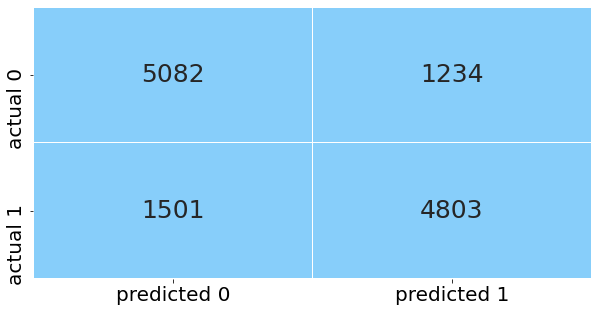

In [44]:
plt.rcParams['figure.figsize'] = [10,5]
plt_confusion_matrices(log_ols_model)

# CLASSIFICATION REPORT

In [45]:
print(classi_report(log_ols_model))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      6316
           1       0.80      0.76      0.78      6304

    accuracy                           0.78     12620
   macro avg       0.78      0.78      0.78     12620
weighted avg       0.78      0.78      0.78     12620



# FROM MATRICS

In [46]:
reports(log_ols_model)

precision_score -  0.7955938379990062
recall_score -  0.7618972081218274
accuracy_score -  0.7832805071315373
f1_score -  0.7783810064014262


# ROC CURVE

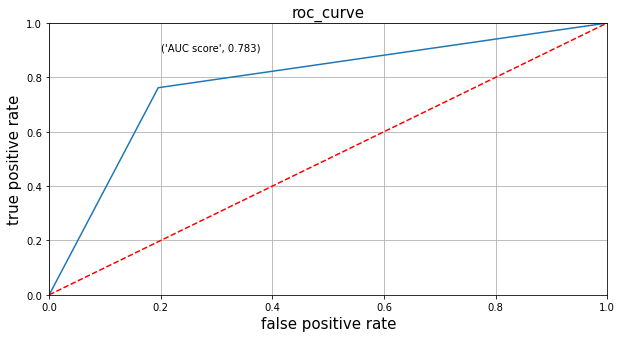

In [47]:
plt_roc(log_ols_model)

In [48]:
score = pd.DataFrame(columns = ['MODELS','AUC SCORE','PRESCION SCORE','RECALL SCORE','ACCURACY SCORE','F1-SCORE'])
score = pd.DataFrame({'MODELS':['log_ols_model'],
                    'AUC SCORE': [roc_auc_score(y1_test,y1_predict)] ,
                    'PRESCION SCORE':[precision_score(y1_test,y1_predict)],
                    'RECALL SCORE':[recall_score(y1_test,y1_predict)],
                    'ACCURACY SCORE':[accuracy_score(y1_test,y1_predict)],
                    'F1-SCORE':[f1_score(y1_test,y1_predict)]})
  

In [49]:
score

,MODELS,AUC SCORE,PRESCION SCORE,RECALL SCORE,ACCURACY SCORE,F1-SCORE
0,log_ols_model,0.78326,0.795594,0.761897,0.783281,0.778381


# THRESHOLD VALUE FOR IMBALANCED DATASET

In [50]:
y1_predict_roc = log_ols_model.predict(x1_test)
y1_predict_roc.head()

15602    0.210110
6592     0.112201
7025     0.212346
1850     0.129048
37704    0.420923
dtype: float64

In [51]:
y_predicted = []
for i in y1_predict_roc:
    if i > 0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)    

In [52]:
fpr,tpr,threshold = roc_curve(y1_test,y_predicted)

In [53]:
print(fpr)
print(tpr)
print(threshold)

[0.         0.19537682 1.        ]
[0.         0.76189721 1.        ]
[2 1 0]


# LOGISTIC REGRESSION (SGD)

In [65]:
from sklearn.linear_model import SGDClassifier
SGD_mdl= SGDClassifier(loss = 'log', random_state = 10)
log_reg_SGD = SGD_mdl.fit(x1_train,y1_train)

In [66]:
x1_test

,const,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,...,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
15602,1.0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
6592,1.0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
7025,1.0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1850,1.0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
37704,1.0,0,1,0,0,1,0,1,1,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40432,1.0,1,0,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
723,1.0,0,1,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
33796,1.0,1,0,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
4175,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
y1_prob_predict = log_reg_SGD.predict_proba(x1_test)[:,1]

In [68]:
y1_predict = []
for i in y1_prob_predict:
    if i > 0.5:
        y1_predict.append(1)
    else:
        y1_predict.append(0)

In [69]:
fpr, tpr , thresholds = roc_curve(y1_test,y1_predict)
k = tpr - fpr
q = np.argmax(k)
thresholds[q]

1

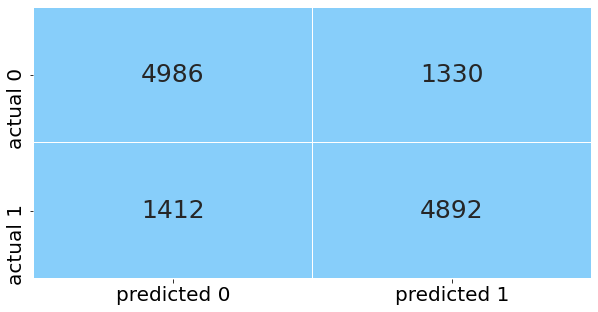

In [58]:
plt_confusion_matrices(log_reg_SGD)

In [59]:
SGD = classi_report(log_reg_SGD)
print(SGD)

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      6316
           1       0.79      0.78      0.78      6304

    accuracy                           0.78     12620
   macro avg       0.78      0.78      0.78     12620
weighted avg       0.78      0.78      0.78     12620



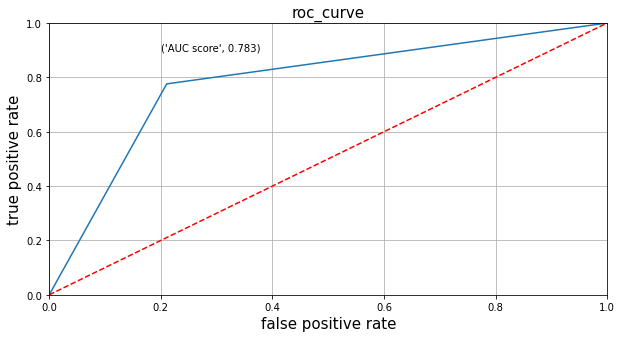

In [60]:
plt_roc(log_reg_SGD)

In [61]:
print(precision_score(y1_test,y1_predict))
print(recall_score(y1_test,y1_predict))
print(accuracy_score(y1_test,y1_predict))
print(f1_score(y1_test,y1_predict))

0.7862423657987785
0.7760152284263959
0.7827258320126783
0.7810953217307999


In [62]:
score 

,MODELS,AUC SCORE,PRESCION SCORE,RECALL SCORE,ACCURACY SCORE,F1-SCORE
0,log_ols_model,0.78326,0.795594,0.761897,0.783281,0.778381


In [63]:
model2 = pd.DataFrame({'MODELS':['log_with_sgd'],
             'AUC SCORE':[accuracy_score(y1_test,y1_predict)],
             'PRESCION SCORE':[precision_score(y1_test,y1_predict)],
               'RECALL SCORE':[recall_score(y1_test,y1_predict)],
             'ACCURACY SCORE':[accuracy_score(y1_test,y1_predict)],
             'F1-SCORE':[f1_score(y1_test,y1_predict)]})

In [64]:
score = score.append(model2)

In [65]:
score

,MODELS,AUC SCORE,PRESCION SCORE,RECALL SCORE,ACCURACY SCORE,F1-SCORE
0,log_ols_model,0.783260,0.795594,0.761897,0.783281,0.778381
0,log_with_sgd,0.782726,0.786242,0.776015,0.782726,0.781095


# MODEL - 2 LOGISTIC REGRESSION

In [66]:
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)


(29446, 68)
(12620, 68)
(29446, 1)
(12620, 1)


In [67]:
from sklearn.linear_model import LogisticRegression
log_mdl = LogisticRegression()
log_mdl = log_mdl.fit(x1_train,y1_train)

In [68]:
y1_predict = log_mdl.predict(x1_test)
y1_predict

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

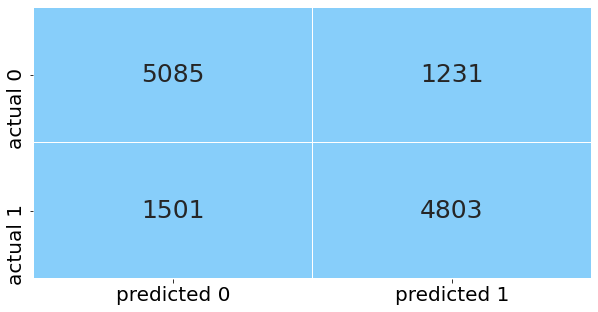

In [69]:
plt_confusion_matrices(log_mdl)

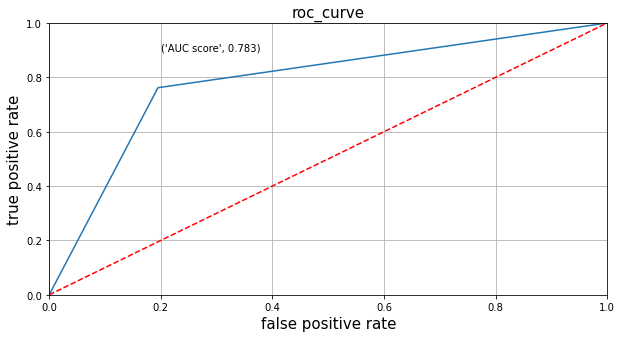

In [70]:
plt_roc(log_mdl)

In [71]:
print(classi_report(log_mdl))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      6316
           1       0.80      0.76      0.78      6304

    accuracy                           0.78     12620
   macro avg       0.78      0.78      0.78     12620
weighted avg       0.78      0.78      0.78     12620



In [72]:
print(precision_score(y1_test,y1_predict))
print(recall_score(y1_test,y1_predict))
print(accuracy_score(y1_test,y1_predict))
print(f1_score(y1_test,y1_predict))

0.7959893934371892
0.7618972081218274
0.7835182250396197
0.7785702707083806


In [73]:
model3 = pd.DataFrame({'MODELS':['log_reg'],
             'AUC SCORE':[accuracy_score(y1_test,y1_predict)],
             'PRESCION SCORE':[precision_score(y1_test,y1_predict)],
               'RECALL SCORE':[recall_score(y1_test,y1_predict)],
             'ACCURACY SCORE':[accuracy_score(y1_test,y1_predict)],
             'F1-SCORE':[f1_score(y1_test,y1_predict)]})

In [74]:
score = score.append(model3)
score

,MODELS,AUC SCORE,PRESCION SCORE,RECALL SCORE,ACCURACY SCORE,F1-SCORE
0,log_ols_model,0.783260,0.795594,0.761897,0.783281,0.778381
0,log_with_sgd,0.782726,0.786242,0.776015,0.782726,0.781095
0,log_reg,0.783518,0.795989,0.761897,0.783518,0.778570


# MODEL - 3 FEATURE SCALING

In [75]:
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)


(29446, 68)
(12620, 68)
(29446, 1)
(12620, 1)


In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.fit_transform(x1_test)

In [84]:
from sklearn.linear_model import LogisticRegression
sc_mdl = LogisticRegression().fit(x1_train,y1_train)


In [85]:
y1_predict = sc_mdl.predict(x1_test)


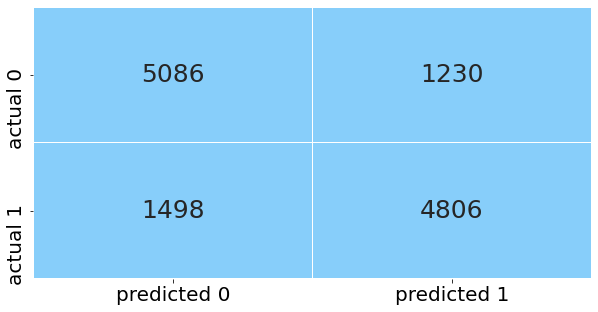

In [86]:
plt_confusion_matrices(sc_mdl)

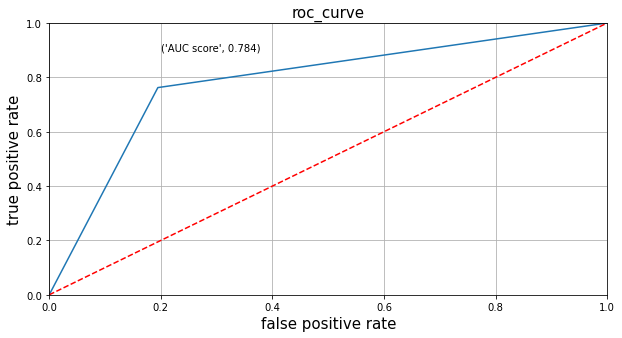

In [87]:
plt_roc(sc_mdl)

In [88]:
print(precision_score(y1_test,y1_predict))
print(recall_score(y1_test,y1_predict))
print(accuracy_score(y1_test,y1_predict))
print(f1_score(y1_test,y1_predict))

0.7962226640159046
0.7623730964467005
0.7838351822503962
0.7789303079416532


In [89]:
model4 = pd.DataFrame({'MODELS':['sc_mdl'],
             'AUC SCORE':[accuracy_score(y1_test,y1_predict)],
             'PRESCION SCORE':[precision_score(y1_test,y1_predict)],
               'RECALL SCORE':[recall_score(y1_test,y1_predict)],
             'ACCURACY SCORE':[accuracy_score(y1_test,y1_predict)],
             'F1-SCORE':[f1_score(y1_test,y1_predict)]})

In [90]:
score = score.append(model4)
score

,MODELS,AUC SCORE,PRESCION SCORE,RECALL SCORE,ACCURACY SCORE,F1-SCORE
0,log_ols_model,0.783260,0.795594,0.761897,0.783281,0.778381
0,log_with_sgd,0.782726,0.786242,0.776015,0.782726,0.781095
0,log_reg,0.783518,0.795989,0.761897,0.783518,0.778570
0,sc_mdl,0.783835,0.796223,0.762373,0.783835,0.778930


# DESCION TREE

In [91]:
from sklearn import tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
descion_model = DecisionTreeClassifier(criterion='gini',max_depth= 3,max_leaf_nodes= 15)
descion_model = descion_model.fit(x1_train,y1_train)

In [94]:
y1_predict = descion_model.predict(x1_test)

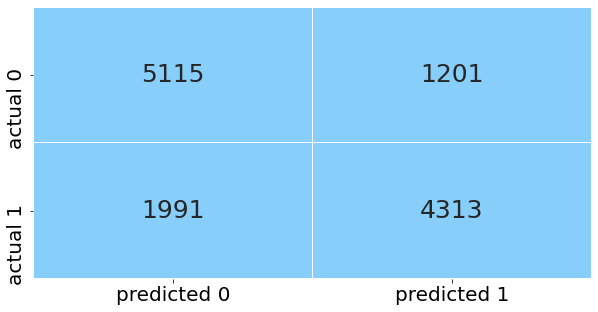

In [95]:
plt_confusion_matrices(descion_model)

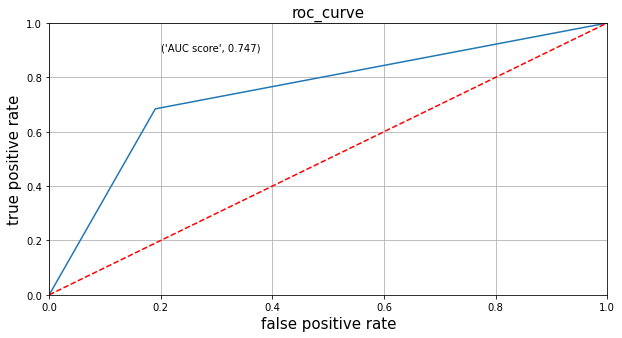

In [96]:
plt_roc(descion_model)

In [97]:
model_5 = pd.DataFrame({'MODELS':['descion_model'],
             'AUC SCORE':[accuracy_score(y1_test,y1_predict)],
             'PRESCION SCORE':[precision_score(y1_test,y1_predict)],
               'RECALL SCORE':[recall_score(y1_test,y1_predict)],
             'ACCURACY SCORE':[accuracy_score(y1_test,y1_predict)],
             'F1-SCORE':[f1_score(y1_test,y1_predict)]})

In [98]:
score = score.append(model_5)
score

,MODELS,AUC SCORE,PRESCION SCORE,RECALL SCORE,ACCURACY SCORE,F1-SCORE
0,log_ols_model,0.783260,0.795594,0.761897,0.783281,0.778381
0,log_with_sgd,0.782726,0.786242,0.776015,0.782726,0.781095
0,log_reg,0.783518,0.795989,0.761897,0.783518,0.778570
0,sc_mdl,0.783835,0.796223,0.762373,0.783835,0.778930
0,descion_model,0.747068,0.782191,0.684169,0.747068,0.729904


# BAGGING  MODEL

In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [100]:
bagging_mdl = BaggingClassifier(tree.DecisionTreeClassifier(criterion='gini',max_depth= 3,max_leaf_nodes=15))
bagging_mdl = bagging_mdl.fit(x1_train,y1_train)

In [101]:
y_predict = bagging_mdl.predict(x1_test)

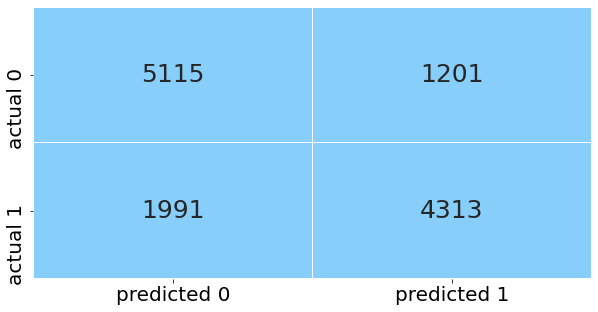

In [102]:
plt_confusion_matrices(bagging_mdl)

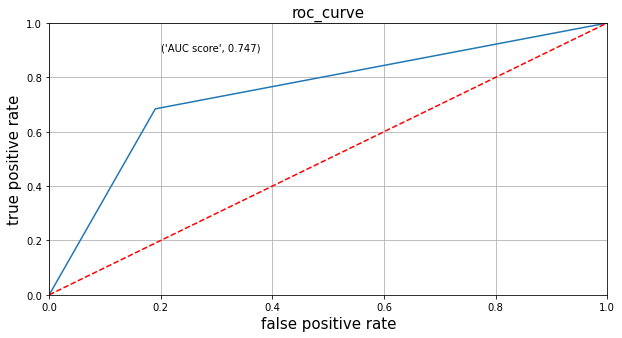

In [103]:
plt_roc(bagging_mdl)

In [104]:
model_6 = pd.DataFrame({'MODELS':['bagging_mdl'],
             'AUC SCORE':[accuracy_score(y1_test,y1_predict)],
             'PRESCION SCORE':[precision_score(y1_test,y1_predict)],
               'RECALL SCORE':[recall_score(y1_test,y1_predict)],
             'ACCURACY SCORE':[accuracy_score(y1_test,y1_predict)],
             'F1-SCORE':[f1_score(y1_test,y1_predict)]})

In [105]:
score = score.append(model_6)

In [106]:
score

,MODELS,AUC SCORE,PRESCION SCORE,RECALL SCORE,ACCURACY SCORE,F1-SCORE
0,log_ols_model,0.783260,0.795594,0.761897,0.783281,0.778381
0,log_with_sgd,0.782726,0.786242,0.776015,0.782726,0.781095
0,log_reg,0.783518,0.795989,0.761897,0.783518,0.778570
0,sc_mdl,0.783835,0.796223,0.762373,0.783835,0.778930
0,descion_model,0.747068,0.782191,0.684169,0.747068,0.729904
0,bagging_mdl,0.747068,0.782191,0.684169,0.747068,0.729904


# ADABOOST

In [107]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state = 1)
adaboost = adaboost.fit(x1_train,y1_train)

In [108]:
y1_predict = adaboost.predict(x1_test)

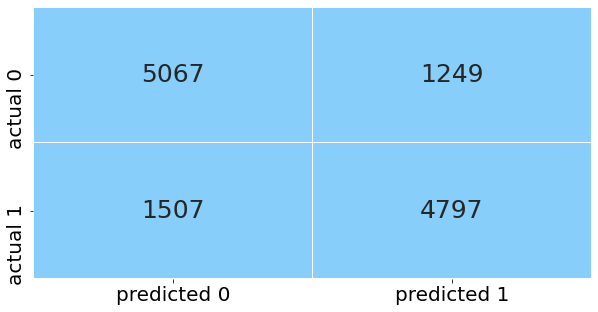

In [109]:
plt_confusion_matrices(adaboost)

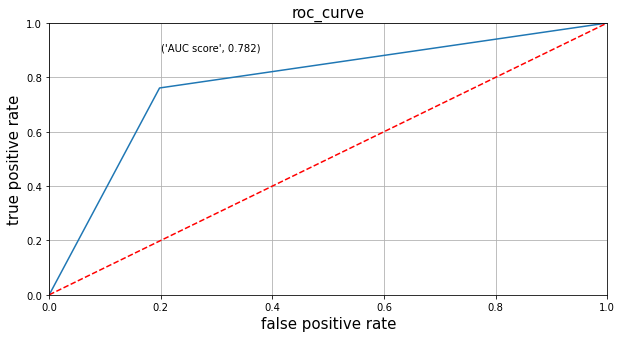

In [110]:
plt_roc(adaboost)

In [111]:
model_7 = pd.DataFrame({'MODELS':['adaboost'],
             'AUC SCORE':[accuracy_score(y1_test,y1_predict)],
             'PRESCION SCORE':[precision_score(y1_test,y1_predict)],
               'RECALL SCORE':[recall_score(y1_test,y1_predict)],
             'ACCURACY SCORE':[accuracy_score(y1_test,y1_predict)],
             'F1-SCORE':[f1_score(y1_test,y1_predict)]})

In [112]:
score = score.append(model_7)
score

,MODELS,AUC SCORE,PRESCION SCORE,RECALL SCORE,ACCURACY SCORE,F1-SCORE
0,log_ols_model,0.783260,0.795594,0.761897,0.783281,0.778381
0,log_with_sgd,0.782726,0.786242,0.776015,0.782726,0.781095
0,log_reg,0.783518,0.795989,0.761897,0.783518,0.778570
0,sc_mdl,0.783835,0.796223,0.762373,0.783835,0.778930
0,descion_model,0.747068,0.782191,0.684169,0.747068,0.729904
0,bagging_mdl,0.747068,0.782191,0.684169,0.747068,0.729904
0,adaboost,0.781616,0.793417,0.760945,0.781616,0.776842


# k-nn

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn_model = knn_model.fit(x1_train,y1_train)

In [114]:
y1_predict = knn_model.predict(x1_test)

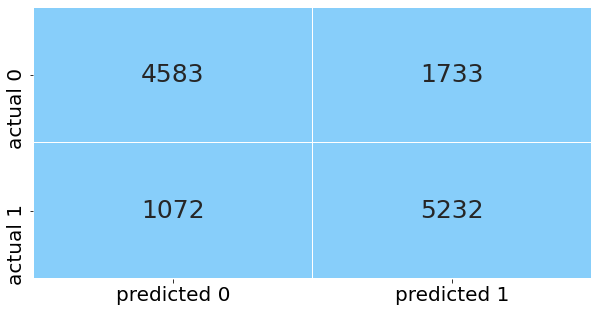

In [115]:
plt_confusion_matrices(knn_model)

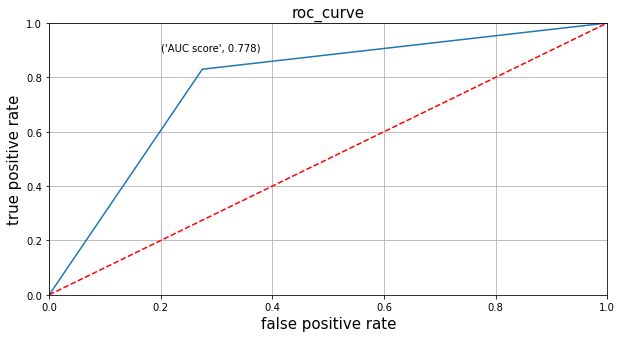

In [116]:
plt_roc(knn_model)

In [117]:
model_8 = pd.DataFrame({'MODELS':['knn_model'],
             'AUC SCORE':[accuracy_score(y1_test,y1_predict)],
             'PRESCION SCORE':[precision_score(y1_test,y1_predict)],
               'RECALL SCORE':[recall_score(y1_test,y1_predict)],
             'ACCURACY SCORE':[accuracy_score(y1_test,y1_predict)],
             'F1-SCORE':[f1_score(y1_test,y1_predict)]})

In [118]:
score = score.append(model_8)
score

,MODELS,AUC SCORE,PRESCION SCORE,RECALL SCORE,ACCURACY SCORE,F1-SCORE
0,log_ols_model,0.783260,0.795594,0.761897,0.783281,0.778381
0,log_with_sgd,0.782726,0.786242,0.776015,0.782726,0.781095
0,log_reg,0.783518,0.795989,0.761897,0.783518,0.778570
0,sc_mdl,0.783835,0.796223,0.762373,0.783835,0.778930
0,descion_model,0.747068,0.782191,0.684169,0.747068,0.729904
0,bagging_mdl,0.747068,0.782191,0.684169,0.747068,0.729904
0,adaboost,0.781616,0.793417,0.760945,0.781616,0.776842
0,knn_model,0.777734,0.751184,0.829949,0.777734,0.788605
